# [Lab Session 4](deconvolution.ipynb)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from skimage import color
from skimage.restoration import wiener
from scipy.signal import convolve as conv
from scipy.stats import multivariate_normal as multi_normal

np.random.seed(0)

Load the image. We will use a *binary* ground truth image for this task (instead of an *intensity* image) since the effect of deconvolution is better visible when a binary image is used.

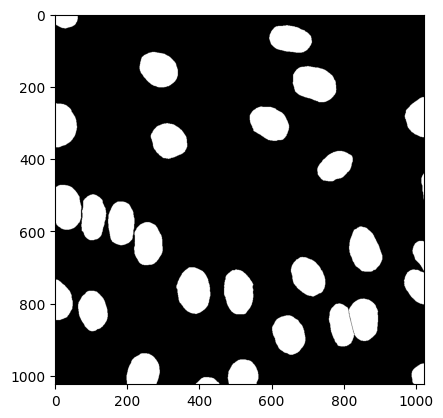

In [2]:
img = plt.imread(f'data/NIH3T3/gt/0.png')[:, :1024]
plt.imshow(img, 'gray')

**[Task 1.]()** Apply the following PSF to the image and display it.

In [ ]:
psf_size = 20
psf = np.ones((psf_size, psf_size)) / psf_size ** 2

**[Task 2.]()** Have a look at the Gaussian PSF which is not uniformly distributed. Apply it to the image.

In [ ]:
def create_psf(size):
    factor = size * 1.8
    x, y = np.mgrid[0:size:1, 0:size:1]
    pos = np.empty(x.shape + (2,))
    pos[:, :, 0] = x
    pos[:, :, 1] = y
    rv = multi_normal([int(size / 2), (int(size / 2))], [[factor * 1., factor * 1.2], [factor * .5, factor * .7]])
    return rv.pdf(pos)

plt.imshow(create_psf(psf_size), 'gray')

Apply the second psf to the image:

**[Task 3.]()** Implement a reusable function that does the Richardson-Lucy deconvolution.

In [ ]:
def richardson_lucy_deconvolution(image, psf, n_iterations):
    img_deconv = np.full(image.shape, 0.5)
    
    ### Insert code here
    
    img_deconv[img_deconv > 1] = 1
    img_deconv[img_deconv < -1] = -1
    return img_deconv

**[Task 4.]()** Apply the Richardson-Lucy deconvolution to the blurred image.

In [ ]:
plt.figure(figsize=(10,5))
plt.subplot(1, 3, 1)
plt.axis('off')
plt.imshow(img, 'gray')
plt.subplot(1, 3, 2)
plt.axis('off')
plt.imshow(img_psf, 'gray')
plt.subplot(1, 3, 3)
plt.axis('off')
plt.imshow(deconv_img, 'gray')

**[Task 5.]()** Add noise to the image, use the R-L deconvolution again.

In [ ]:
noise = (np.random.normal(loc=5, size=img.shape))
reduce_factor = 50
noise = noise / reduce_factor

**[Task 6.]()** Compare your R-L implementation to a wiener deconvolution.

**[Task 7.]()** Repeat Tasks 4–6 using a smaller value for the size of the PSF.

**[Task 8.]()** Use a wrong PSF to restore the image